# Introduction to Linear/Logistic regressions

## Content

1. Basics of learning theory
    + Supervised Learning
    + Unsupervised Learning
    + Reinforsment learning
    + Other learning
    + Empirical risk minimization
    + Generalization: overfitting and underfitting
    + Bayes theorem: medicine example
    + ML & MAP: coin example
+ Linear Regression
    + Least Squares method
    + Gaussian distribution
    + Sufficient statistics of Gaussian
    + Probabilistic approach to Linear Regression
+ Regularization
    + Polynomial regression and ovefitting
    + L2 regularization
    + L1 regularization
    + Visualization of Lp regularization
+ Logistic Regression

In [1]:
%matplotlib inline
import numpy as np
np.random.seed(12345)
import seaborn as sns
sns.set_style("dark")
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 16, 12

In [2]:
plt.rcParams['figure.figsize'] = 16, 12

In [3]:
def generate_wave_set(n_support=1000, n_train=25, n_test=None, std=0.3):
    data = {}
    data['support'] = np.linspace(0, 2*np.pi, num=1000)
    data['values'] = np.sin(data['support']) + 1
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    if n_test is not None:
        data['x_test'] = np.sort(np.random.choice(data['support'], size=n_test, replace=True))
        data['y_test'] = np.sin(data['x_test']) + 1 + np.random.normal(0, std, size=data['x_test'].shape[0])
    return data

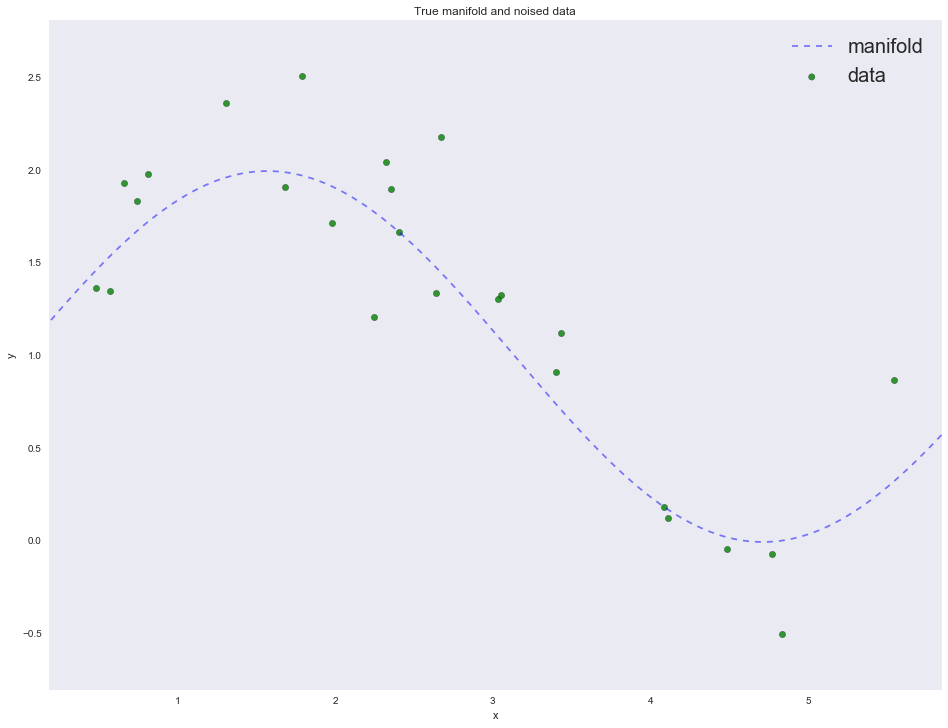

In [4]:
data = generate_wave_set(1000, 25)

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

$$\Large \mathcal{L}\left(\vec{w}, X, \vec{y}\right) = \frac{1}{2} \left\| X \vec{w} - \vec{y} \right\|_2^2 = \frac{1}{2} \sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right)^2 = \frac{1}{2} \left(X\vec{w} - \vec{y}\right)^T \left(X\vec{w} - \vec{y}\right)$$
$$\Large \hat{w} = \left(X^T X\right)^{-1}X^T \vec{y}$$

Top rows of X
[[ 1.          0.48428956]
 [ 1.          0.57234221]
 [ 1.          0.66039485]
 [ 1.          0.74215802]
 [ 1.          0.81134225]]
Fitted params
[ 2.42648096 -0.42818065]


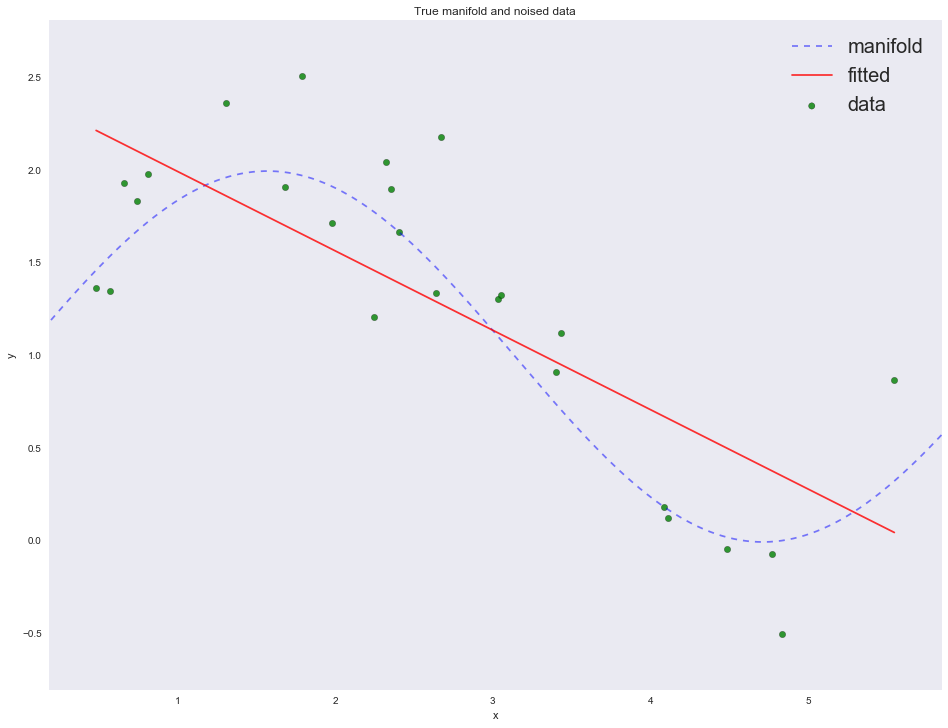

In [5]:
X = np.array([[1]*data['x_train'].shape[0], data['x_train']]).T
print 'Top rows of X'
print X[:5, :]
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
print 'Fitted params'
print w
y_hat = np.dot(w, X.T)

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

plt.plot(data['x_train'], y_hat, 'r', alpha=0.8, label='fitted')

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

$$\Large P_n\left(x\right) = \sum_{i=0}^n = w_0 + w_1 x + w_1 x^2 + \cdots + w_n x^n$$

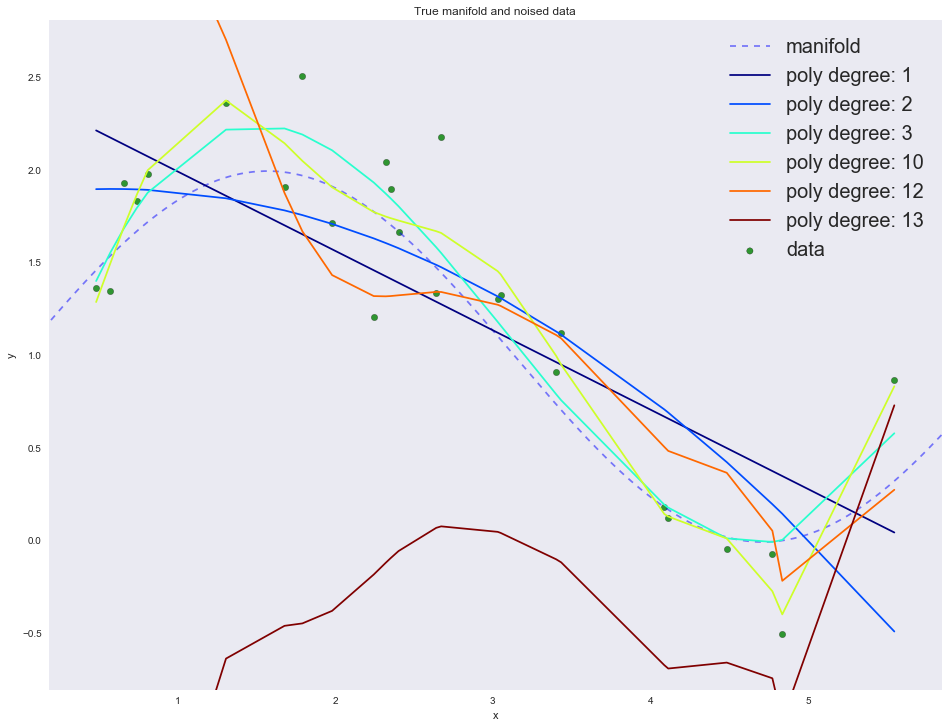

In [6]:
degree_list = [1, 2, 3, 10, 12, 13]
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

w_list = []
for ix, degree in enumerate(degree_list):
    dlist = [[1]*data['x_train'].shape[0]] + \
            map(lambda n: data['x_train']**n, range(1, degree + 1))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
    w_list.append((degree, w))
    y_hat = np.dot(w, X.T)
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

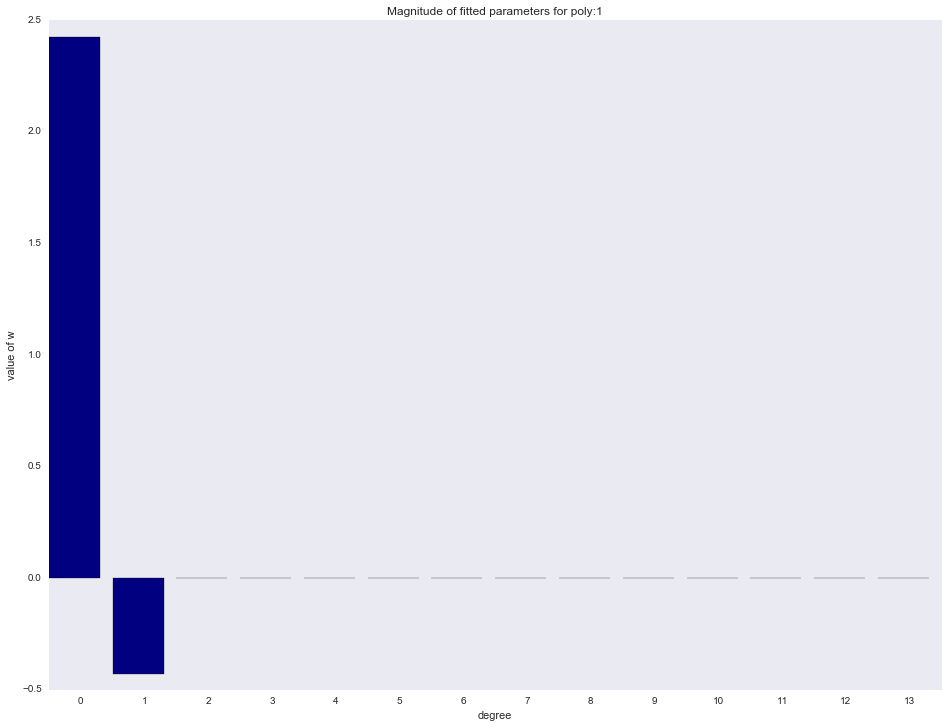

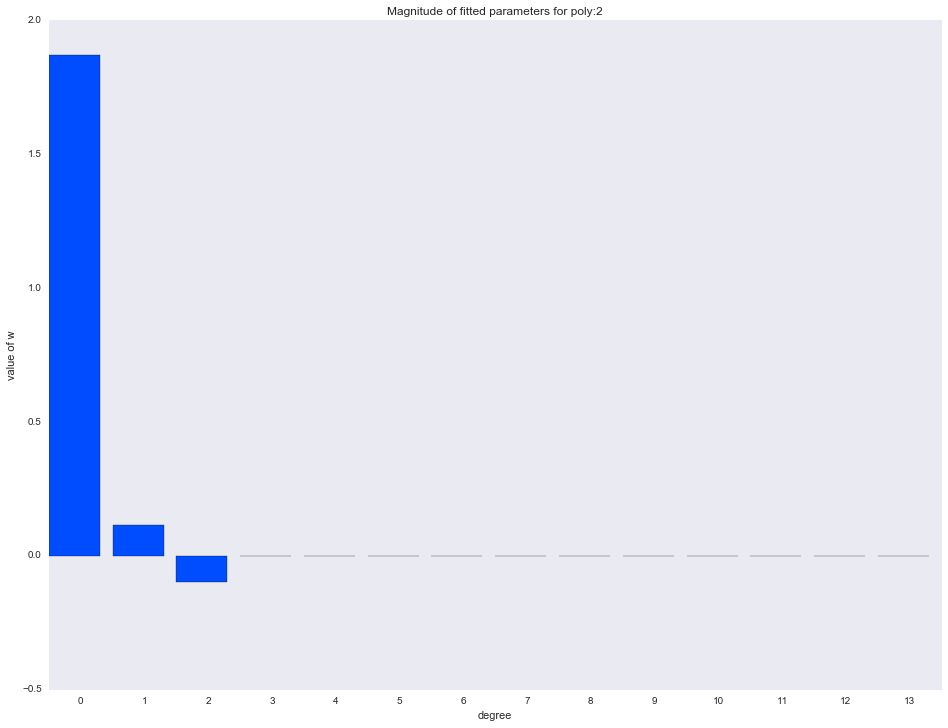

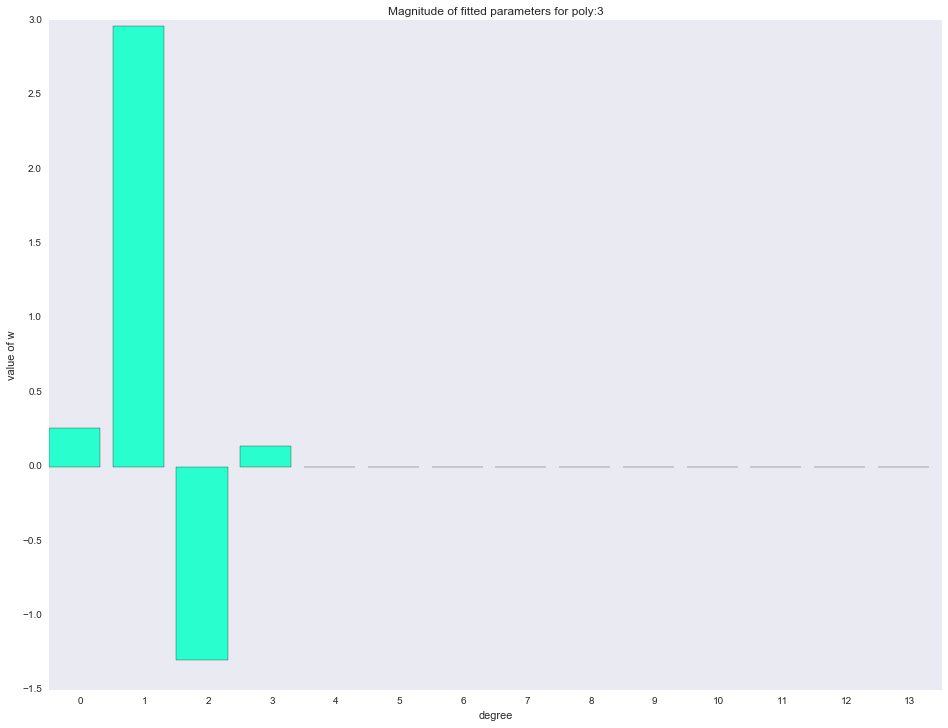

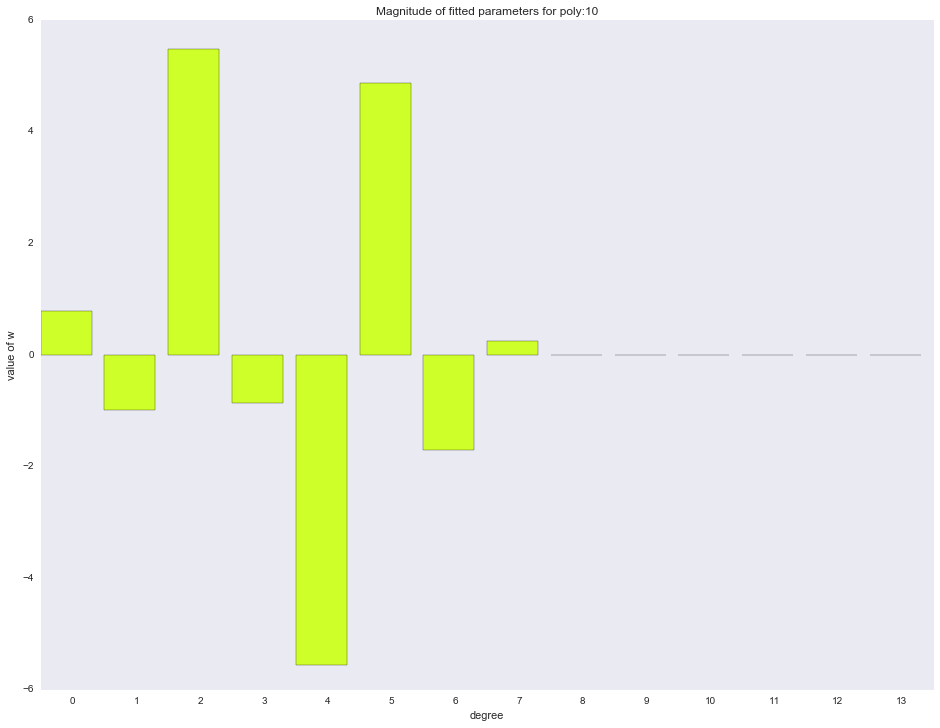

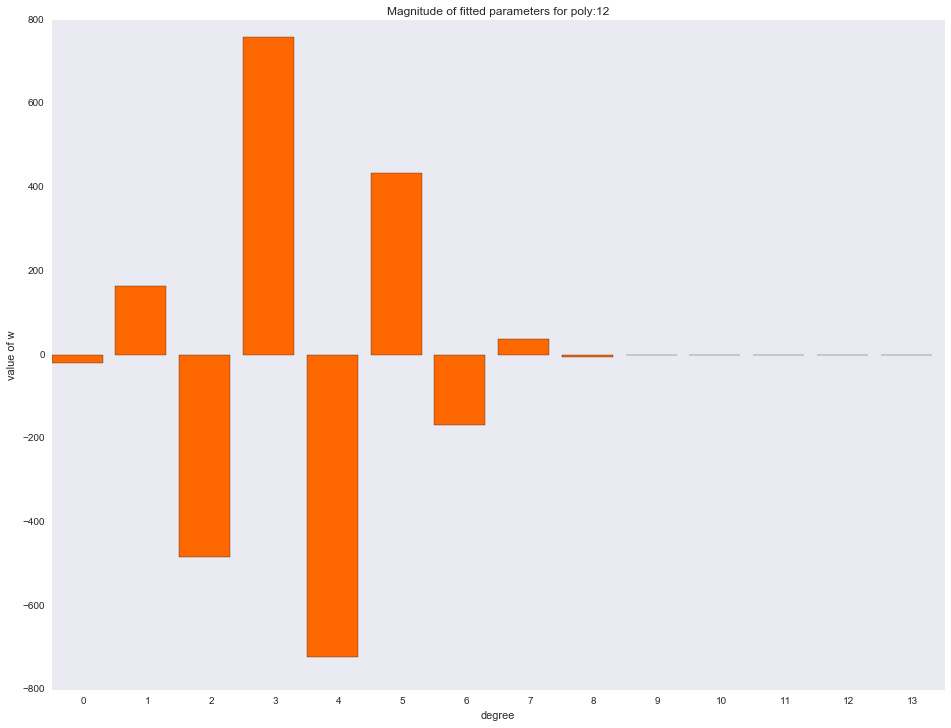

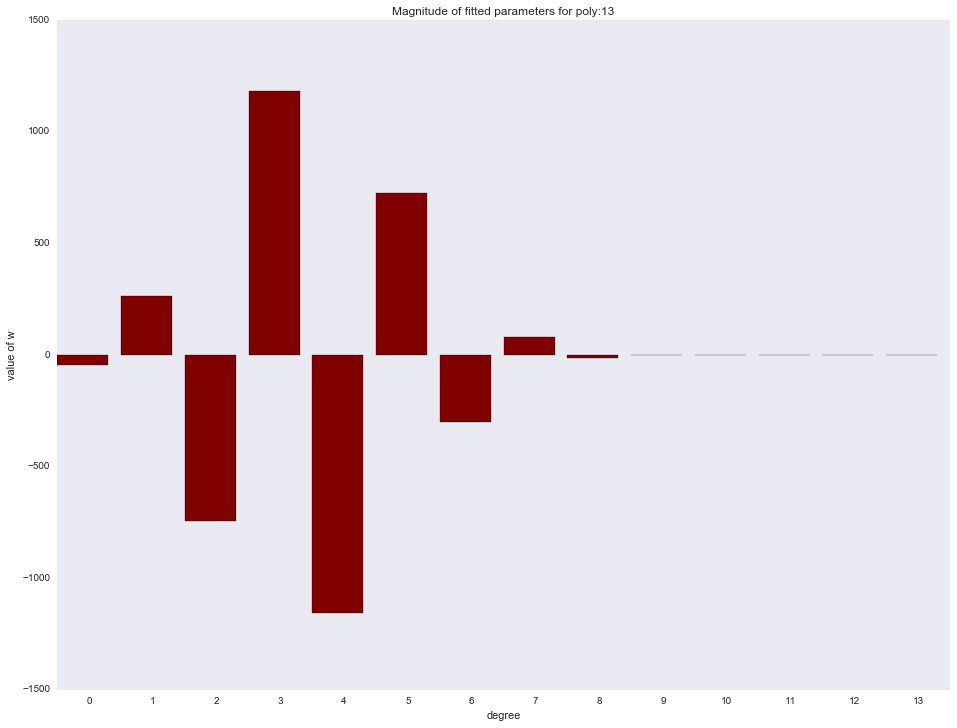

In [7]:
for ix, t in enumerate(w_list):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted parameters for poly:%i' % degree)
    plt.xlabel('degree')
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

$$\Large \mathcal{L}\left(\vec{w}, X, \vec{y}\right) = \frac{1}{2} \left\| X \vec{w} - \vec{y} \right\|_2^2 = \frac{1}{2} \sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right)^2$$
$$\Large R\left(\vec{w}\right) = \frac{1}{2} \left\| \vec{w} \right\|_2^2 = \frac{1}{2} \sum_{j=1}^m w_j^2$$
$$\Large \mathcal{L}_{new}\left(\vec{w}, X, \vec{y}\right) = J\left(\vec{w}, X, \vec{y}\right) + \lambda R\left(\vec{w}\right)$$
$$\Large \hat{w} = \left(X^T X + \lambda I\right)^{-1} X^T \vec{y}$$

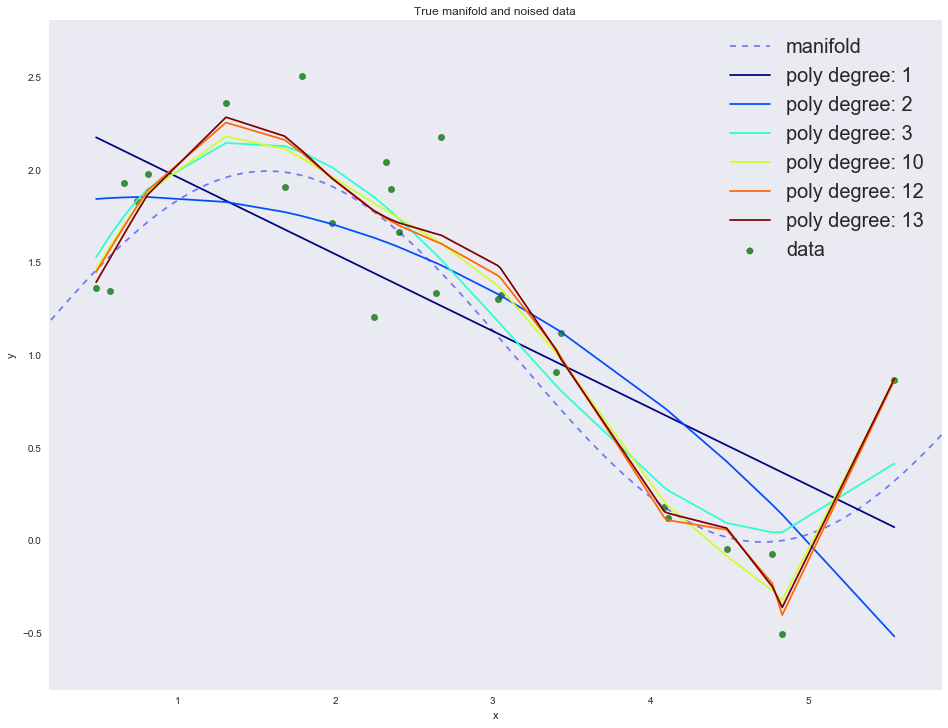

In [8]:
lmbd = 0.1

degree_list = [1, 2, 3, 10, 12, 13]
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

w_list_l2 = []
for ix, degree in enumerate(degree_list):
    dlist = [[1]*data['x_train'].shape[0]] + map(lambda n: data['x_train']**n, range(1, degree + 1))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + lmbd*np.eye(X.shape[1])), X.T), data['y_train'])
    w_list_l2.append((degree, w))
    y_hat = np.dot(w, X.T)
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

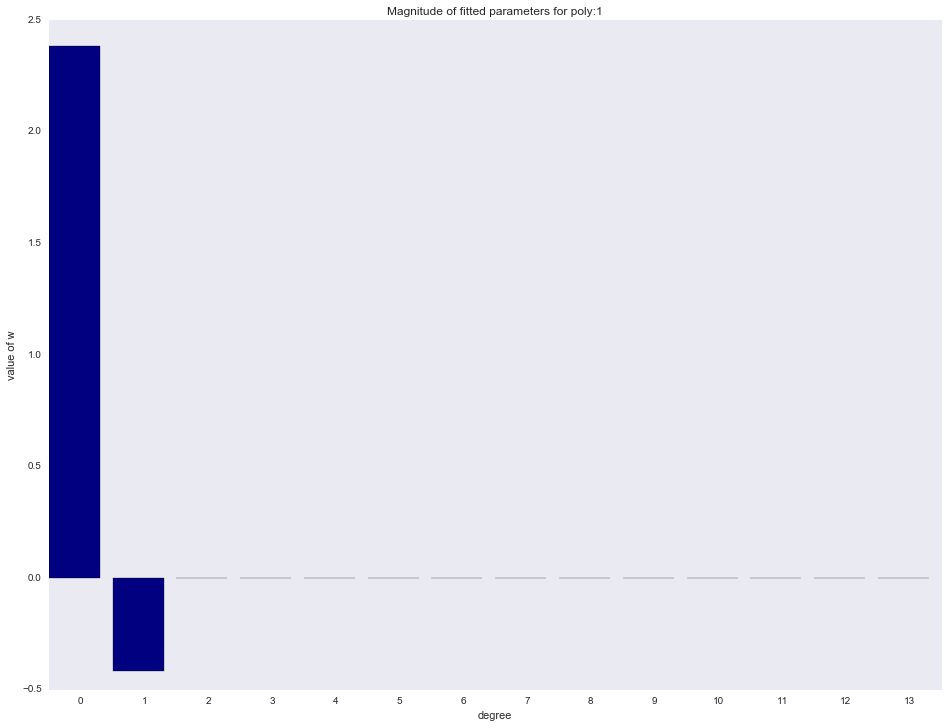

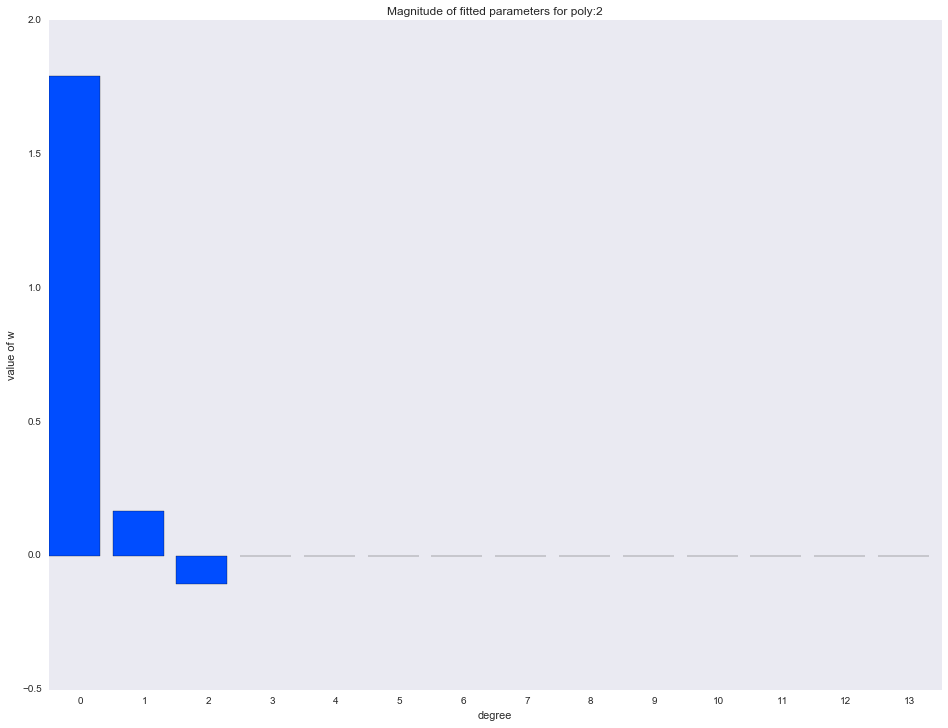

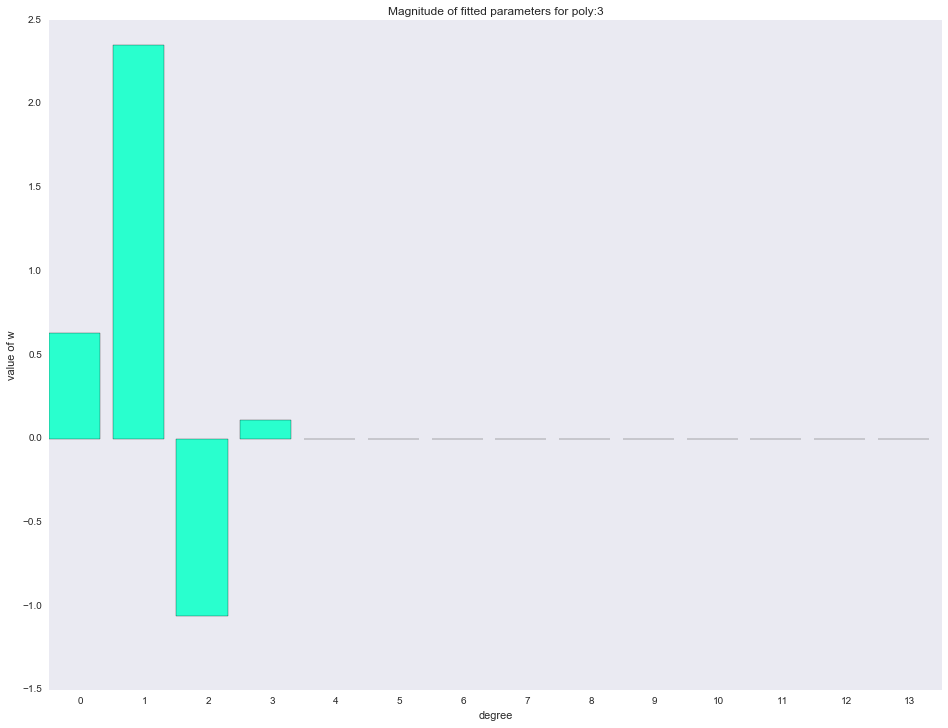

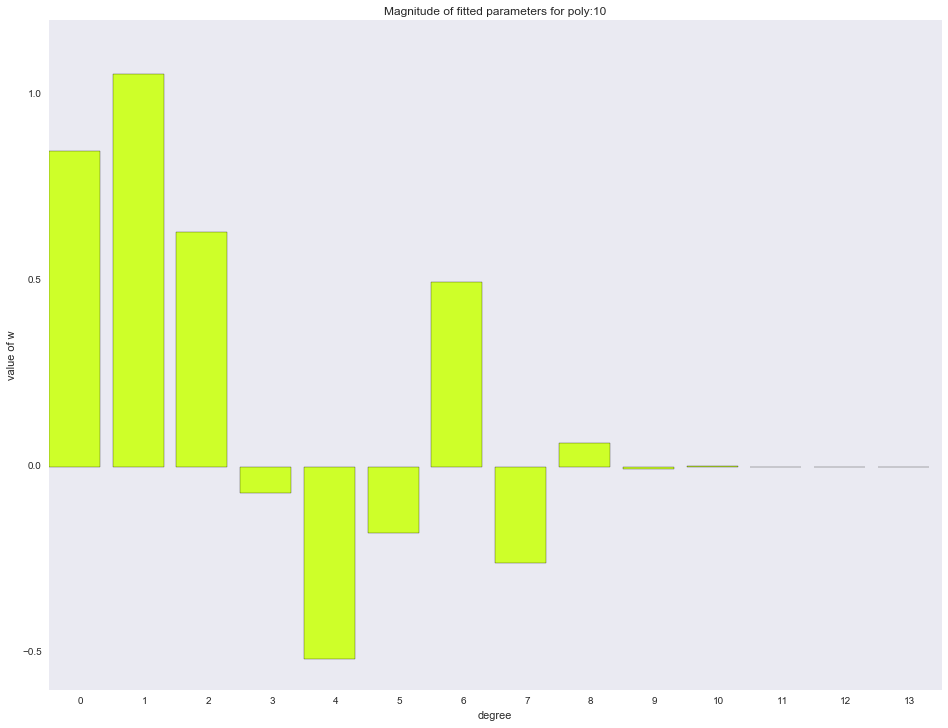

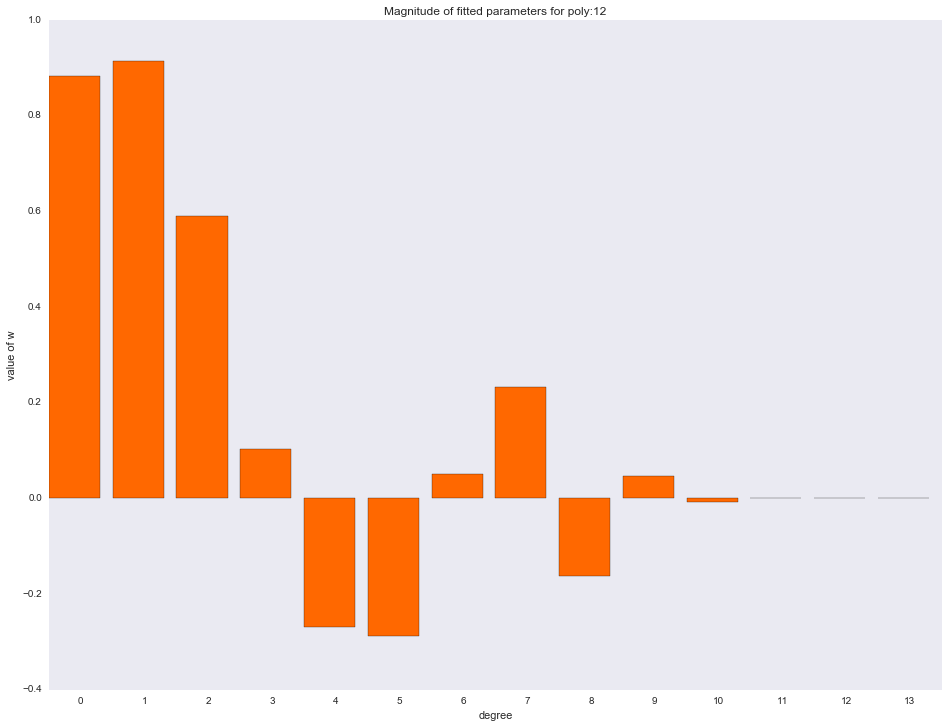

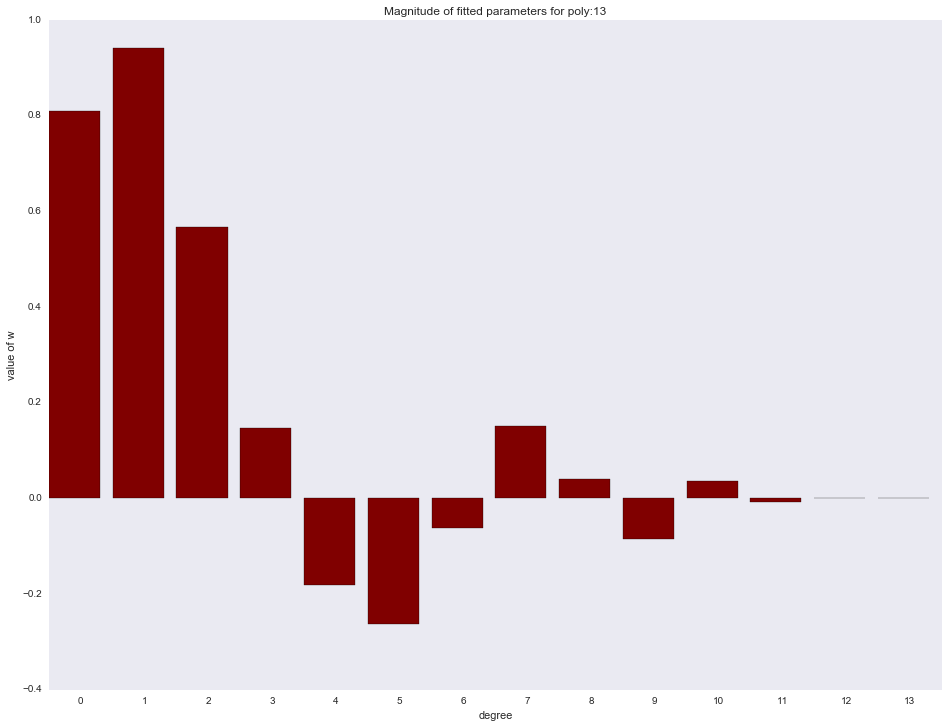

In [9]:
for ix, t in enumerate(w_list_l2):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted parameters for poly:%i' % degree)
    plt.xlabel('degree')
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

$$\Large \mathcal{L}\left(\vec{w}, X, \vec{y}\right) = \frac{1}{2} \left\| X \vec{w} - \vec{y} \right\|_2^2 = \frac{1}{2} \sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right)^2$$
$$\Large R\left(\vec{w}\right) = \left\| \vec{w} \right\|_1 = \sum_{j=1}^m \left|w_j\right|$$
$$\Large \mathcal{L}_{new}\left(\vec{w}, X, \vec{y}\right) = J\left(\vec{w}, X, \vec{y}\right) + \lambda R\left(\vec{w}\right)$$
$$\Large \frac{\partial \mathcal{L}}{\partial w_j} = \sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right) \vec{x_i} + \text{sign}(\vec{w})$$

In [10]:
lmbd = 1
degree = 13
dlist = [[1]*data['x_train'].shape[0]] + map(lambda n: data['x_train']**n, range(1, degree + 1))
X = np.array(dlist).T

def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

w = np.array([-1.0] * X.shape[1])
n_iter = 18
lr = 0.1
loss = []
for ix in range(n_iter):
    w -= lr*(np.dot(np.dot(X, w) - data['y_train'], X)/X.shape[0] + lmbd*np.sign(w))
    y_hat = np.dot(X, w)
    loss.append(mse(data['y_train'], y_hat))
    print loss[-1]

1.30512309607e+52
1.21979102448e+86
1.14003816795e+120
1.06549974406e+154
9.95834820717e+187
9.3072475679e+221
8.69871744673e+255
8.12997448128e+289
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf


$$\Large \overline{\mu}_{\cdot j} = \frac{1}{n} \sum_{i=1}^n x_{ij}$$
$$\Large \overline{\sigma}_{\cdot j} = \sqrt{\frac{1}{n} \sum_{i=1}^n \left( x_{ij} - \overline{\mu}_{\cdot j} \right)}$$

X mean:
[  1.00000000e+00   2.61717625e+00   8.89178866e+00   3.46858633e+01
   1.47337824e+02   6.62964718e+02   3.10664370e+03   1.49946179e+04
   7.40097896e+04   3.71757450e+05   1.89408958e+06   9.76488362e+06
   5.08473839e+07   2.67042329e+08]
X std
[  0.00000000e+00   1.42904764e+00   8.26280332e+00   4.36295151e+01
   2.28694895e+02   1.20605446e+03   6.41842261e+03   3.44672461e+04
   1.86543640e+05   1.01602565e+06   5.56120143e+06   3.05530627e+07
   1.68325268e+08   9.29250585e+08]


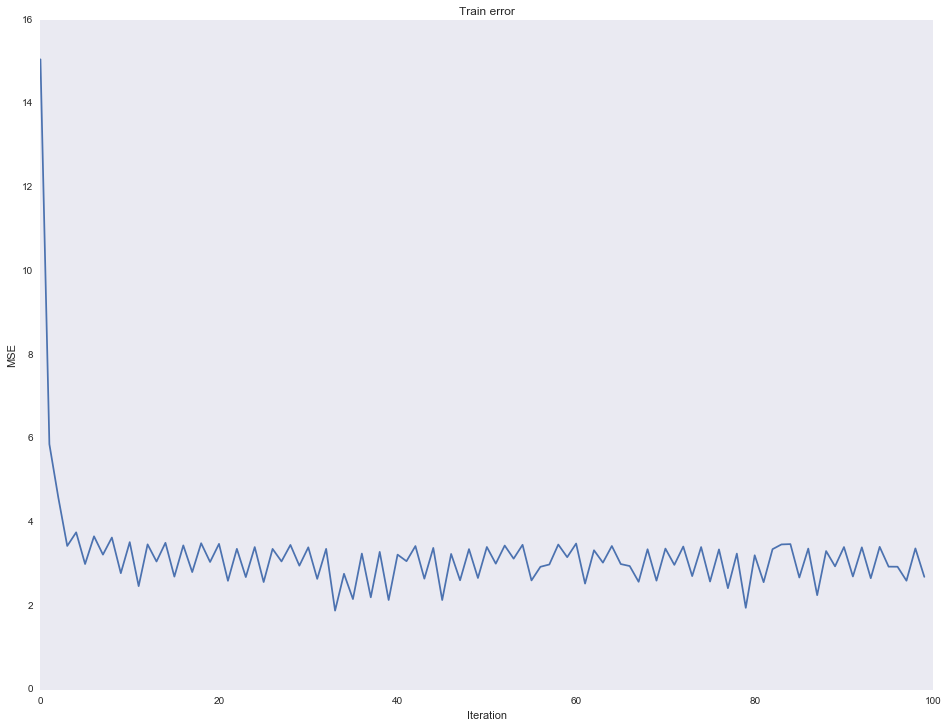

In [11]:
lmbd = 1
degree = 13
dlist = [[1]*data['x_train'].shape[0]] + map(lambda n: data['x_train']**n, range(1, degree + 1))
X = np.array(dlist).T
x_mean = X.mean(axis=0)
print 'X mean:'
print x_mean
x_std = X.std(axis=0)
print 'X std'
print x_std
X = (X - x_mean)/x_std
X[:, 0] = 1.0

def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

w = np.array([-1.0] * X.shape[1])
n_iter = 100
lr = 0.1
loss = []
for ix in range(n_iter):
    w -= lr*(np.dot(np.dot(X, w) - data['y_train'], X)/X.shape[0] + lmbd*np.sign(w))
    y_hat = np.dot(X, w)
    loss.append(mse(data['y_train'], y_hat))

plt.plot(loss)
plt.title('Train error')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

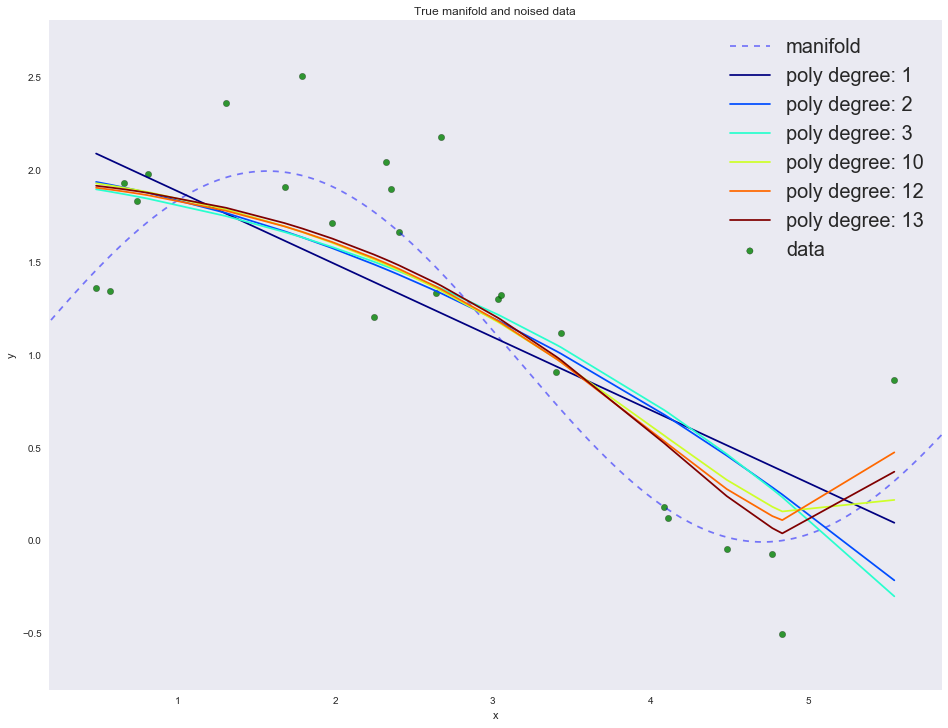

In [12]:
degree_list = [1, 2, 3, 10, 12, 13]
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

def fit_lr_l1(X, y, lmbd, n_iter=100, lr=0.1):
    w = np.array([-1.0] * X.shape[1])
    loss = []
    for ix_iter in range(n_iter):
        w -= lr*(np.dot(np.dot(X, w) - y, X)/X.shape[0] +lmbd*np.sign(w))
        y_hat = np.dot(X, w)
        loss.append(mse(y, y_hat))
    return w, y_hat, loss
    
w_list_l1 = []
for ix, degree in enumerate(degree_list):
    dlist = [[1]*data['x_train'].shape[0]] + map(lambda n: data['x_train']**n, range(1, degree + 1))
    X = np.array(dlist).T
    x_mean = X.mean(axis=0)
    x_std = X.std(axis=0)
    X = (X - x_mean)/x_std
    X[:, 0] = 1.0
    w, y_hat, loss = fit_lr_l1(X, data['y_train'], lmbd=0.05)
    w_list_l1.append((degree, w))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)
    
    
    
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

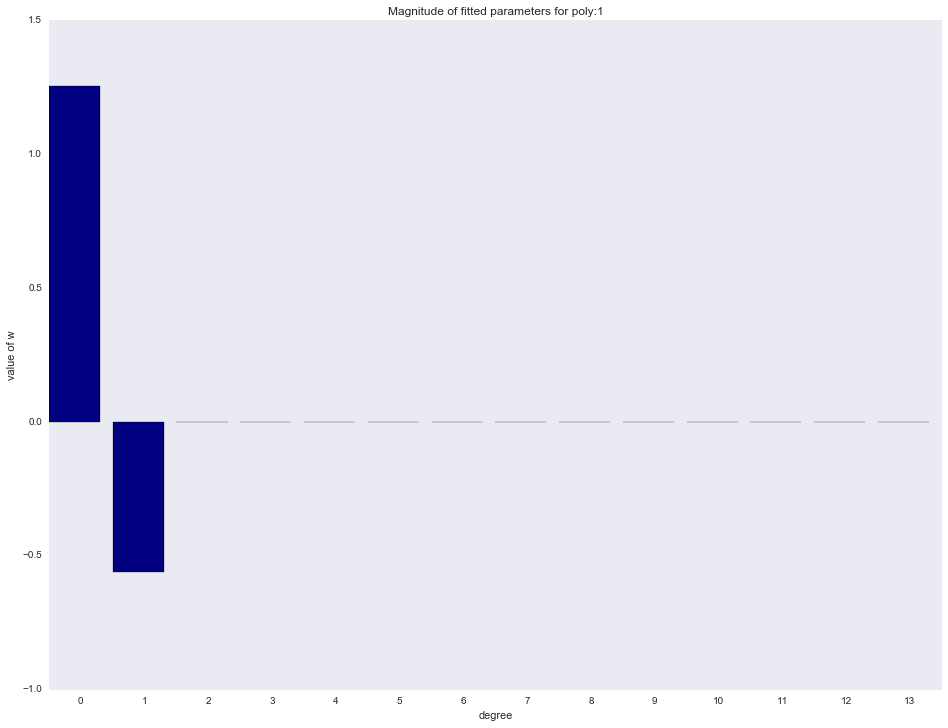

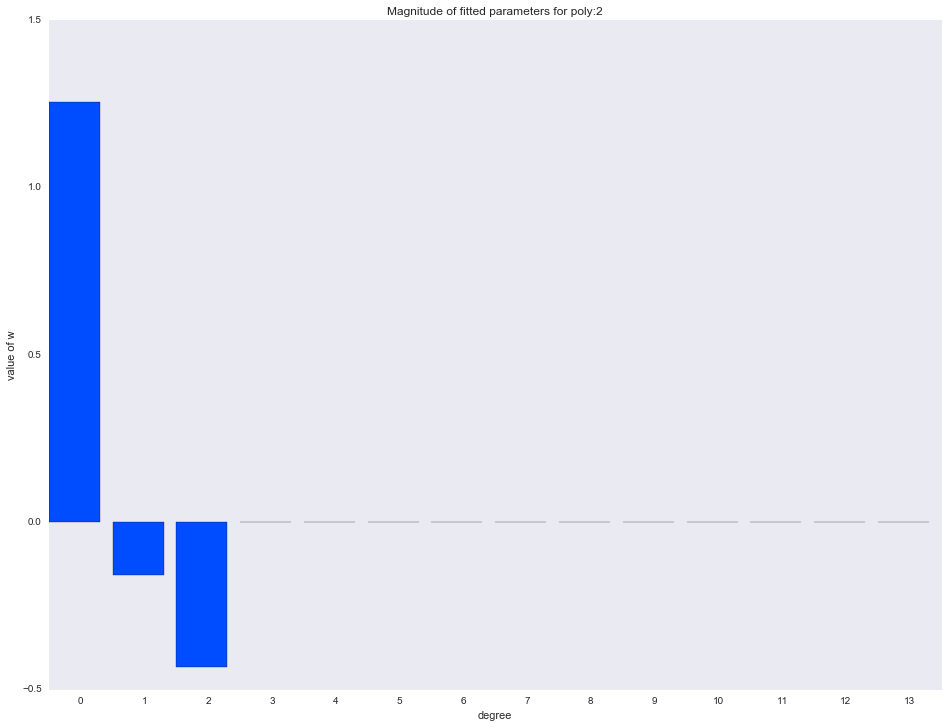

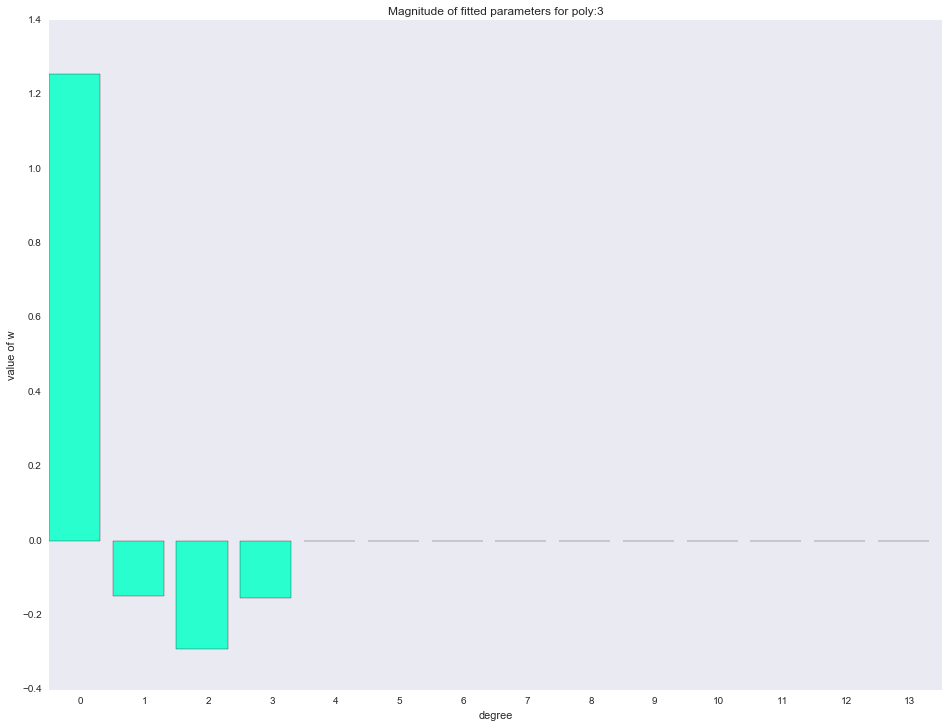

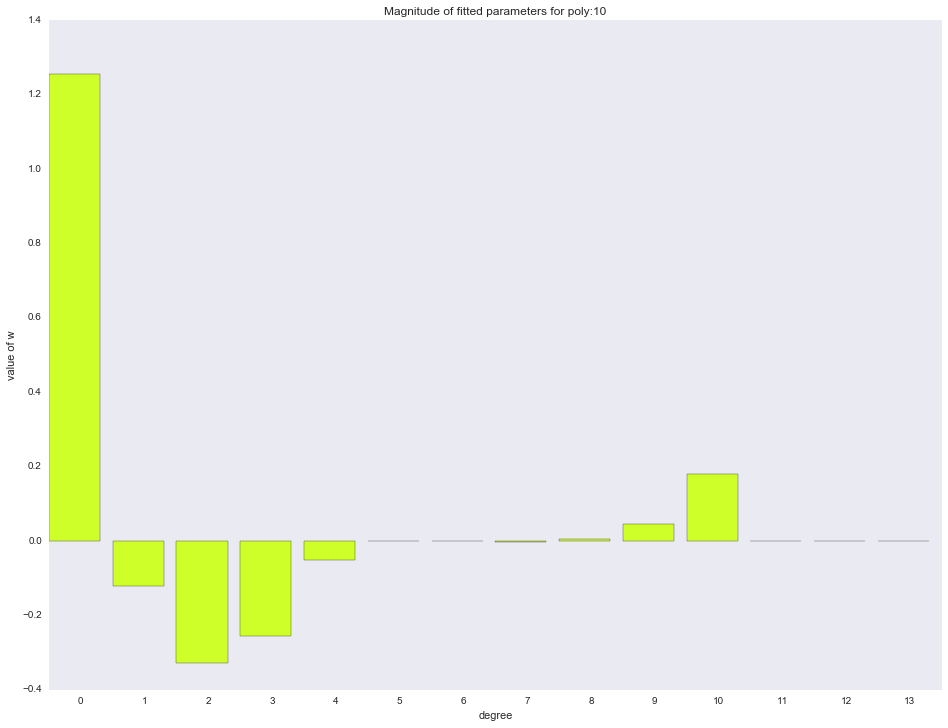

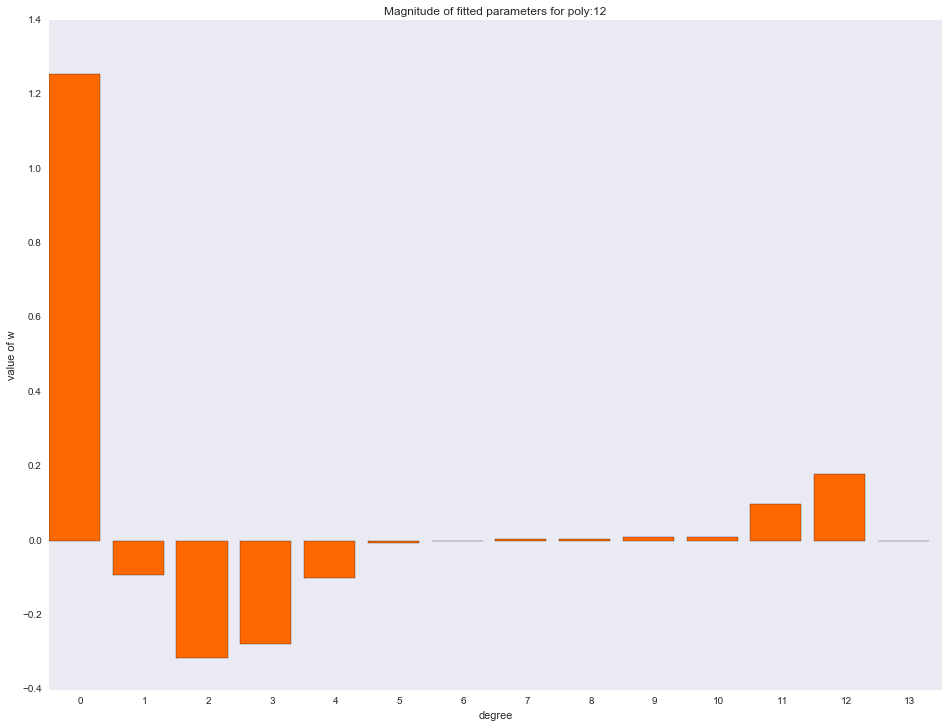

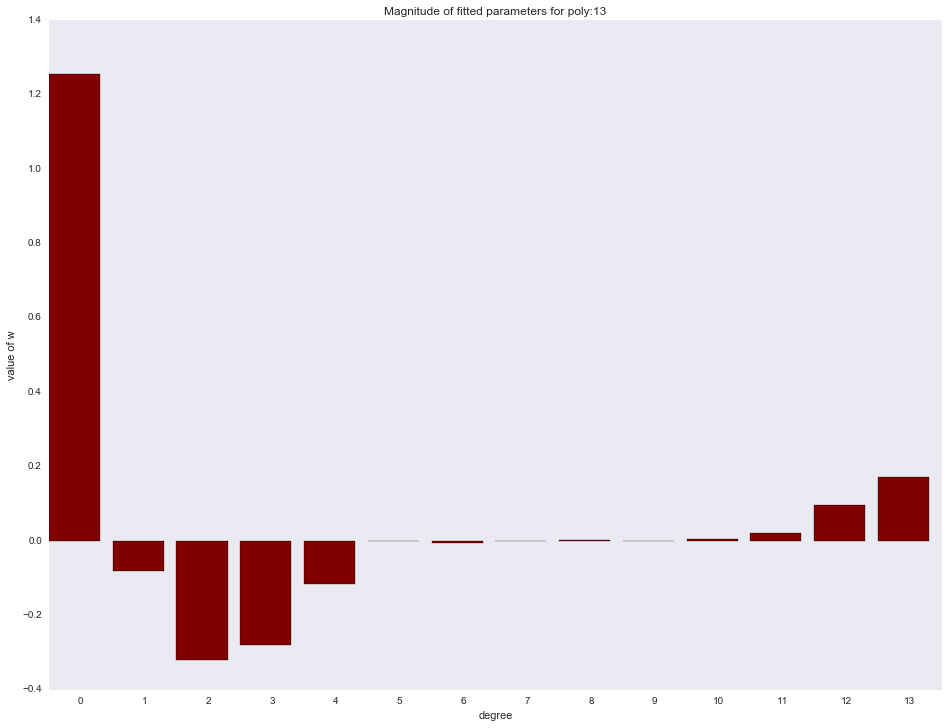

In [13]:
for ix, t in enumerate(w_list_l1):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted parameters for poly:%i' % degree)
    plt.xlabel('degree')
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

In [14]:
import sklearn.datasets

http://scikit-learn.org/stable/datasets/

In [15]:
boston = sklearn.datasets.load_boston()
print 'Shape of the data:', boston.data.shape
data = {}
data['x_train'] = boston.data[100:, :]
data['x_test'] = boston.data[:100, :]
data['y_train'] = boston.target[100:]
data['y_test'] = boston.target[:100]

# data = generate_wave_set(1000, 100, 25)

# margin = 0.3
# plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
# plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='train set')
# plt.scatter(data['x_test'], data['y_test'], 40, 'r', 'o', alpha=0.8, label='test set')
# plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
# plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
# plt.legend(loc='upper right', prop={'size': 20})
# plt.title('True manifold and noised data')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

Shape of the data: (506, 13)


In [16]:
from sklearn.linear_model import ElasticNet

http://scikit-learn.org/stable/modules/linear_model.html

ElasticNet:
$$\Large \mathcal{L}\left(\Theta, X, \vec{y}\right) = \frac{1}{2n} \left\|X\vec{w} - \vec{y}\right\|_2^2 + \lambda \left( \gamma \left\|\vec{w}\right\|_1 + \frac{1}{2} \left(1 - \gamma\right) \left\|\vec{w}\right\|_2^2 \right)$$
where:
* $\lambda$ is for *alpha*
* $\gamma$ is gor *l1_ratio*

In [17]:
from sklearn.metrics import mean_squared_error

http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

* *mean_squared_error* is same as defined above *mse*

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

http://scikit-learn.org/stable/modules/preprocessing.html

In [19]:
degree = 2
alpha = 0.01
l1_ratio = 0.5

pf = PolynomialFeatures(degree=degree, include_bias=False)
ss = StandardScaler()

X_train = ss.fit_transform(pf.fit_transform(data['x_train']))
X_test = ss.transform(pf.transform(data['x_test']))

model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True)
model = model.fit(X_train, data['y_train'])
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

print 'Train error:', mean_squared_error(data['y_train'], y_hat_train)
print 'Test error:', mean_squared_error(data['y_test'], y_hat_test)

Train error: 8.53570837527
Test error: 12.1403416817


/usr/local/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


We can't validate on test set and report that error as final performance

In [20]:
from sklearn.model_selection import KFold

http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

<font color='red'>may be insert image</font>

In [21]:
kf = KFold(n_splits=5, shuffle=True)

mse_train_folds = []
mse_valid_folds = []
for ix_train, ix_valid in kf.split(X_train):
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True)
    model = model.fit(X_train[ix_train, :], data['y_train'][ix_train])
    mse_train_folds.append(
        mean_squared_error(
            data['y_train'][ix_train], 
            model.predict(X_train[ix_train, :])))
    mse_valid_folds.append(
        mean_squared_error(
            data['y_train'][ix_valid], 
            model.predict(X_train[ix_valid, :])))

    
mse_train_folds = np.mean(mse_train_folds)
mse_valid_folds = np.mean(mse_valid_folds)

model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True)
model = model.fit(X_train, data['y_train'])
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

print 'Train error on folds:', mse_train_folds
print 'Train error:', mean_squared_error(data['y_train'], y_hat_train)
print 'Valid error:', mse_valid_folds
print 'Test error:', mean_squared_error(data['y_test'], y_hat_test)

Train error on folds: 8.04735366326
Train error: 8.53570837527
Valid error: 13.9459873335
Test error: 12.1403416817


In [22]:
from tqdm import tqdm

In [23]:
alpha = 0.022
degree = 2
l1_ratio_list = np.linspace(0.01, 1, 100)

kf = KFold(n_splits=2, shuffle=False)
pf = PolynomialFeatures(degree=degree, include_bias=False)
ss = StandardScaler()
X_train = ss.fit_transform(pf.fit_transform(data['x_train']))
X_test = ss.transform(pf.transform(data['x_test']))

mse_train = []
mse_valid = []
mse_test = []
for l1_ratio in tqdm(l1_ratio_list):
    mse_valid_folds = []
    for ix_train, ix_valid in kf.split(X_train):
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True)
        model = model.fit(X_train[ix_train, :], data['y_train'][ix_train])
        mse_valid_folds.append(
            mean_squared_error(
                data['y_train'][ix_valid], 
                model.predict(X_train[ix_valid, :])))
    mse_valid.append(np.mean(mse_valid_folds))
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True)
    model = model.fit(X_train, data['y_train'])
    mse_train.append(mean_squared_error(data['y_train'], model.predict(X_train)))
    mse_test.append(mean_squared_error(data['y_test'], model.predict(X_test)))

100%|██████████| 100/100 [00:04<00:00, 20.33it/s]


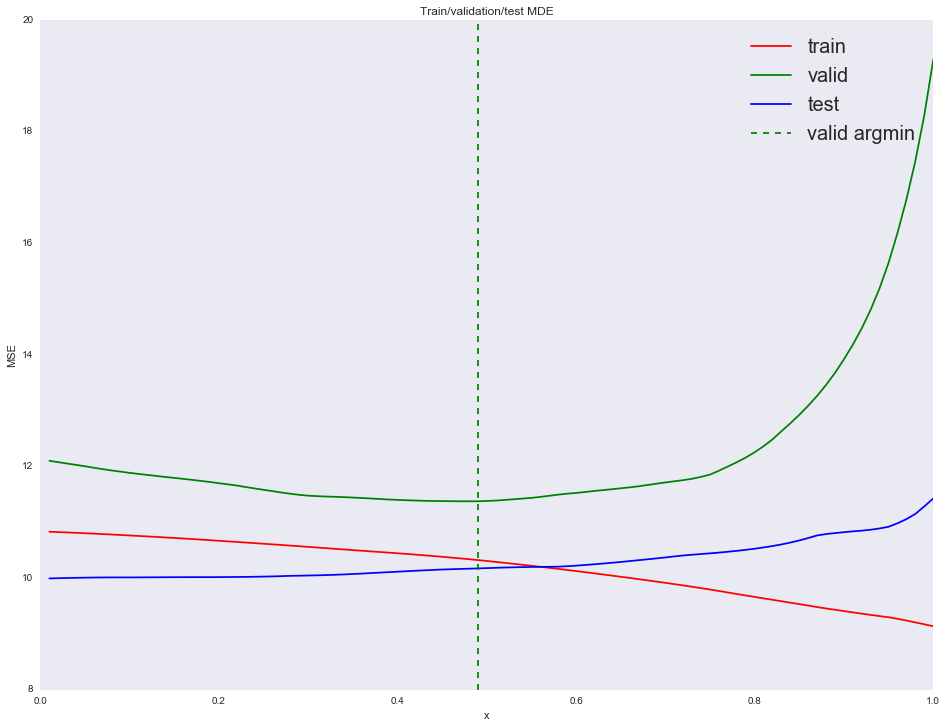

In [24]:
plt.plot(l1_ratio_list, mse_train, c='r', label='train')
plt.plot(l1_ratio_list, np.array(mse_valid)/7, c='g', label='valid')
plt.plot(l1_ratio_list, mse_test, c='b', label='test')

x = sorted(zip(l1_ratio_list, mse_valid), key=lambda t: t[1])[0][0]
plt.axvline(x, color='g', linestyle='--', label='valid argmin')

plt.legend(loc='upper right', prop={'size': 20})
plt.title('Train/validation/test MDE')
plt.xlabel('x')
plt.ylabel('MSE')
plt.show()

In [25]:
from sklearn.pipeline import Pipeline

http://scikit-learn.org/stable/modules/pipeline.html

In [26]:
pipe = Pipeline(steps=[
    ('pf', PolynomialFeatures(include_bias=False)),
    ('ss', StandardScaler()),
    ('en', ElasticNet())
])

In [27]:
from sklearn.model_selection import GridSearchCV

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

*parameters* is a set of hypothesis 

In [28]:
parameters = {
    'pf__degree': [1, 2, 3],
    'en__alpha': [0.001, 0.01, 0.02, 0.1, 0.5],
    'en__l1_ratio': [0.001, 0.01, 0.1, 0.5, 0.9, 1]
}

for k, v in parameters.items():
    print k, v

pf__degree [1, 2, 3]
en__alpha [0.001, 0.01, 0.02, 0.1, 0.5]
en__l1_ratio [0.001, 0.01, 0.1, 0.5, 0.9, 1]


In [29]:
from sklearn.metrics import make_scorer

grid_search = GridSearchCV(pipe, parameters, cv=3, n_jobs=1, verbose=1)

grid_search = grid_search.fit(data['x_train'], data['y_train'])

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:   11.7s finished


In [30]:
print 'Best params:', grid_search.best_params_
print 'Test score:', mean_squared_error(data['y_test'], grid_search.predict(data['x_test']))

Best params: {'en__l1_ratio': 0.1, 'en__alpha': 0.1, 'pf__degree': 2}
Test score: 9.72625553115
